In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [51]:
data = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [52]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
data.species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [54]:
species = list(data.species.unique())

In [55]:
data.species = np.array(data.species.apply(lambda x: species.index(x)))

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

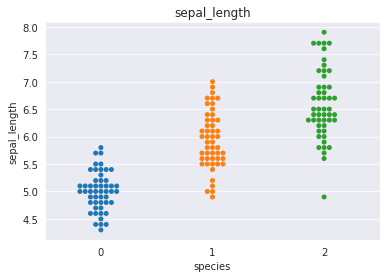

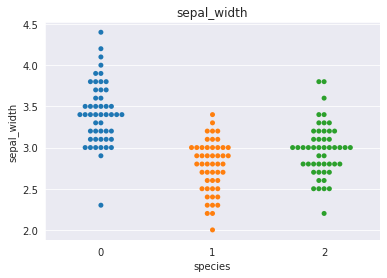

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


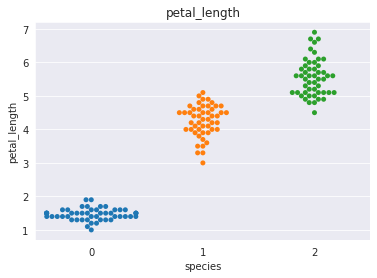

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


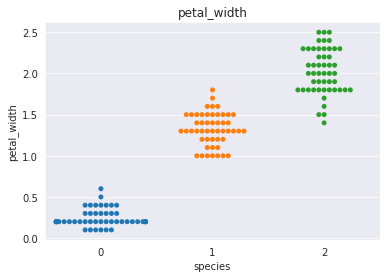

In [57]:
for col in data.columns:
    if(col != 'species'):
        sns.swarmplot(y=col, x='species', data=data)
        plt.title(col)
        plt.show()

In [58]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [59]:
type(data)

pandas.core.frame.DataFrame

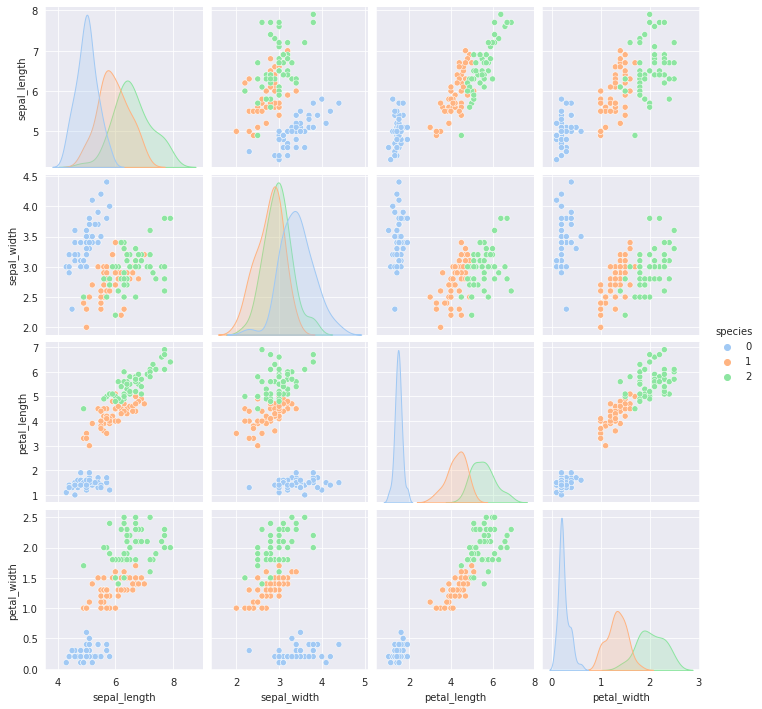

In [60]:
sns.pairplot(data, hue="species", palette="pastel")

In [61]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1]
y=data.species
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train,y_train)
logR.score(X_test,y_test)


0.8947368421052632

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
data.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [64]:
scaler = MinMaxScaler()
scaled = data
for col in data.columns:
    if(col != "species"):
        print(col)
        scaled[col] = scaler.fit_transform(data[col].values.reshape(-1,1))

sepal_length
sepal_width
petal_length
petal_width


In [65]:
scaled

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [66]:
scaled.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species
0.166667      0.458333     0.084746      0.000000     0          3
0.416667      0.291667     0.694915      0.750000     2          2
              0.833333     0.033898      0.041667     0          1
0.444444      0.416667     0.542373      0.583333     1          1
0.527778      0.583333     0.745763      0.916667     2          1
                                                                ..
0.333333      0.125000     0.508475      0.500000     1          1
              0.166667     0.457627      0.375000     1          1
                           0.474576      0.416667     1          1
              0.208333     0.508475      0.500000     1          1
1.000000      0.750000     0.915254      0.791667     2          1
Length: 147, dtype: int64

# CLASSIFICATION

In [67]:
X=scaled.iloc[:,:-1]
y=scaled.species
X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(X_train,y_train)
logR.score(X_test,y_test)


0.9736842105263158

# CLUSTERING

In [68]:
from sklearn.cluster import KMeans
loss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(X)
    loss.append(kmeans.inertia_)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Loss')

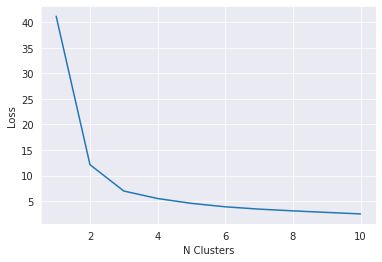

In [69]:
sns.set_style('darkgrid')
sns.lineplot(range(1,11), loss)
plt.xlabel("N Clusters")
plt.ylabel("Loss")


In [70]:
# clusters = np.array([])
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(X)
X["clusters"] = clusters

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

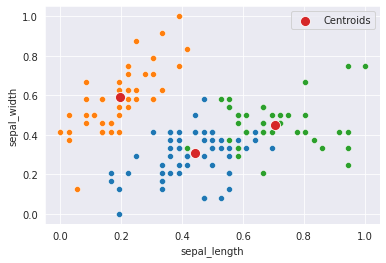

In [71]:
for c in range(3):
    temp = X[X.clusters == c]
    sns.scatterplot(temp.sepal_length, temp.sepal_width)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100,  label = 'Centroids')